In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import namedtuple 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# ** 1. Data Exploring phase**

In this phase I intend to learn more about the data, it's structure, data types, distribution, and how violent the data is by going throw it's attributes and applying some basic statistical techniques

**The Main Questions we need to answer using the data Exploration techniques before working on the data analysis and machine learning model are:**

1. EDA analysis 
2. Are there any outliers ? and what is the nature of these outliers ?
3. How to detect the outliers for each attribute ?
4. Is the data biased for an element for a given value of a column?
5. Are there any missing values ?
6. What are the attributes data types, and how to fix them if any issues were found ?
 

In [2]:
#Importing the data set into a variable Datav1 (type of DataFrame)
Data = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [3]:
#exploring the first 5 entries of the dataset
Data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Note :** The data contains multible attrebutes and 1 output called DEATH_EVENT
The attrebutes supposely are mainly splitted into two types : categories and numerical types

# # 1.1 Data type examination

The objectives of this sub-phase is :

1. Need to examin if the includes any missing values, and in which columns.
2. Examin the type of data in each column.

In [4]:
#Examining the attrebutes types, and the null values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Note :** As indicated all the columns are being treated as numbers and the data types varies from Floats and Integers, 
, yet we need to make sure that we don't have any column the must be treated as non-numerical other than the output column

**Note2 :** No missing values in the data.

# 1.1.01 Solving the Data Types issue

We have detected an issue with the data types, which is all the values are being considered as numeric values, even the categorical features are being treated as numerical.

To solve this issue we need to detect the non-numerical features as a first step , then convert the type of these columns into the correct format.

In [5]:
# Making a copy of the data
Datav1 = Data.copy()

In [6]:
#columns names extraction
columns = Datav1.columns.tolist()

**Note :** As a method that could be used to detect the attribute type is the number of unique values ​​if contains, then examine each column individually to determine its real type.

In [7]:
#counting the number of unique values in each column
columns_no_unique = dict()
for column in columns:
    no_unique = Datav1[column].nunique()
    columns_no_unique[column] = no_unique
print("\n",columns_no_unique)


 {'age': 47, 'anaemia': 2, 'creatinine_phosphokinase': 208, 'diabetes': 2, 'ejection_fraction': 17, 'high_blood_pressure': 2, 'platelets': 176, 'serum_creatinine': 40, 'serum_sodium': 27, 'sex': 2, 'smoking': 2, 'time': 148, 'DEATH_EVENT': 2}


As Indicated the following columns has small number of unique values of 2 unique values (anaemia, diabetes,high_blood_pressure,sex,smoking, and DEATH_EVENT), and after examining them I found them include descriptive values which makes total sense when compared to the data meta: 
* **anaemia** : Decrease of red blood cells or hemoglobin (boolean)
* **diabetes** : If the patient has diabetes (boolean)
* **high_blood_pressure** : If the patient has hypertension (boolean)
* **sex** : Woman or man (binary)
* **smoking** : If the patient smokes or not (boolean)
* **DEATH_EVENT** : If the patient deceased during the follow-up period (boolean)


In [8]:
#extracting the names of the categorical columns, and the names of the numerical columns
Cat_columns = list()
numerical_values = list()
for column in columns : 
    if Datav1[column].nunique() <= 2 :
        Cat_columns.append(column)
    else : 
        numerical_values.append(column)
Cat_columns.remove("DEATH_EVENT")

In [9]:
print("Categorical values : ",Cat_columns)
print("Numerical values : ",numerical_values)

Categorical values :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Numerical values :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


**Note :** Now that we have detected both the numerical and the non numerical features, we can solve the data type issue

In [10]:
#converting the type of the categorical values into category 
for attrebute in Cat_columns : 
    Datav1[attrebute] = Datav1[attrebute].astype("category")

In [11]:
Datav1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(3), int64(5)
memory usage:

**Final result :**

The cateogical attributes are now represented in a "category" data type, while the other numerical data types are being presented in float and int data types.

# 1.2 EDA (Exploratory Data Analysis) :

The objective of this sub-phase is to better understand the data that we have in our hands, using basic statistical measurements.

In [12]:
Datav1[numerical_values].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


**Note :** The value ranges of the platelets and serum_creatinine attributes are not matching the range of the other attributes, which means we have to scale the data before feeding ot to our machine learning model.

**Note 2 :** While comapring the mean of each feature and the median which is represented as the 50% Q we could easly indicate huge differences between them in creatinine_phosphokinase, serum_creatinine, time attributes, which may indicates of the existance of out liers in the columns.
Yet, we need to apply further analysis to beter identify the outliers and where they are located.

# 1.3 Data Bias basic analysis

Data is objective, as humans are building the data, analyzing it, and thus can be biased.

If we executed the best analytical techniques and built the bet machine learning models, still we are going to get bad results as both the analytical results and the machine learning models inherit the bias.

In [13]:
#Calculating the participation percentage of each categorical feature in the data

def percent_value_counts(data, attr):
    percent_df = pd.DataFrame(round(data.loc[:,attr].value_counts(dropna=False, normalize=True)*100,2))
    total_df = pd.DataFrame(data.loc[:,attr].value_counts(dropna=False))
    total_df.columns = ["Total"]
    percent_df.columns = ['Percent']
    print("participation analysis for %s" % attr , " attribute")
    return pd.concat([total_df, percent_df], axis = 1)
    

In [14]:
for attr in Cat_columns :
    print(percent_value_counts(Datav1,attr),"\n")

participation analysis for anaemia  attribute
   Total  Percent
0    170    56.86
1    129    43.14 

participation analysis for diabetes  attribute
   Total  Percent
0    174    58.19
1    125    41.81 

participation analysis for high_blood_pressure  attribute
   Total  Percent
0    194    64.88
1    105    35.12 

participation analysis for sex  attribute
   Total  Percent
1    194    64.88
0    105    35.12 

participation analysis for smoking  attribute
   Total  Percent
0    203    67.89
1     96    32.11 



**Notes :** As we have indiccated for the **Sex** , **high_blood_pressure**, and the **smoking** the is bias issues that need to be solved.

# 1.4 Outliers Analysis

1. Outliers are points of the data that  lies an abnormal distance from other values, 
2. they may cause the analysis results to be misleading, 
3. and may cause the machine learning model to detect false patterns 

which leads to poor preformance in the future, so they need to be detected and dealt with.

There are many techniques to be used to detect the outliers like the Z-score, DBSCAN,and the Isolation Forest, yet I'll be using the IQR method in this project.

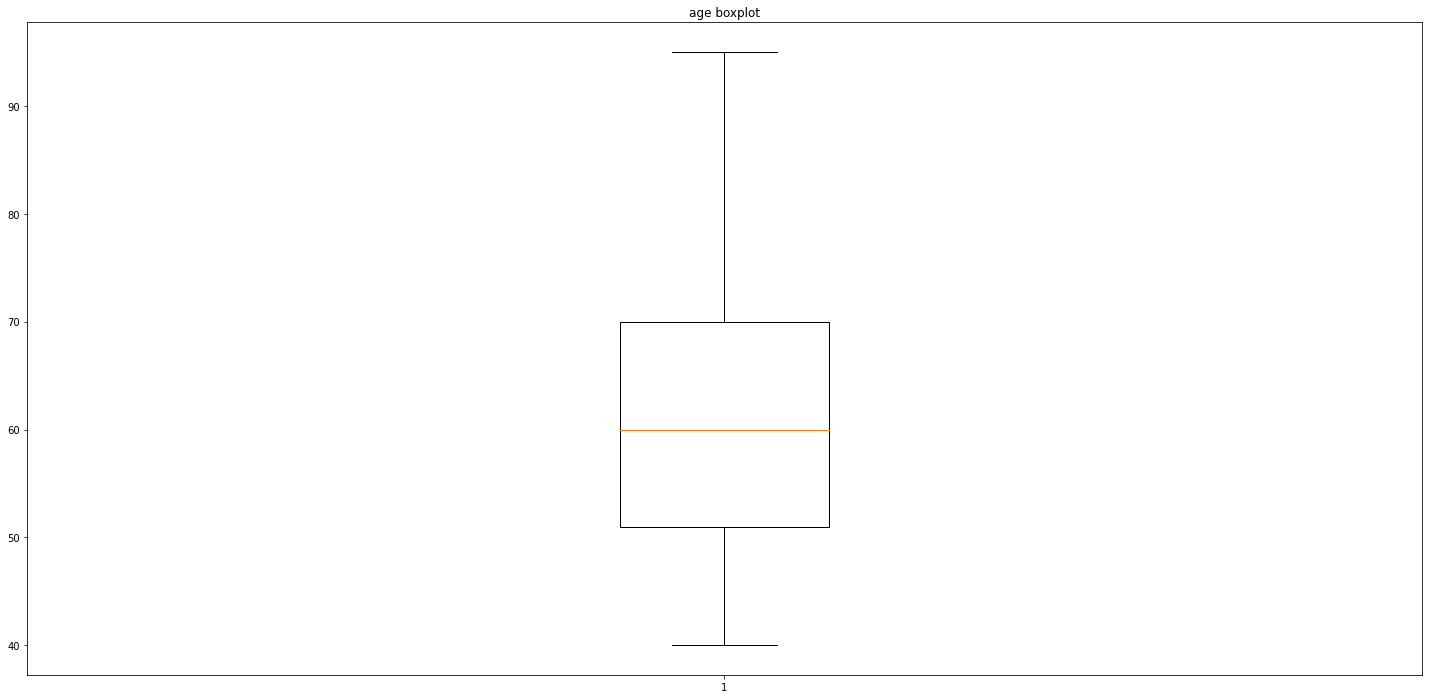

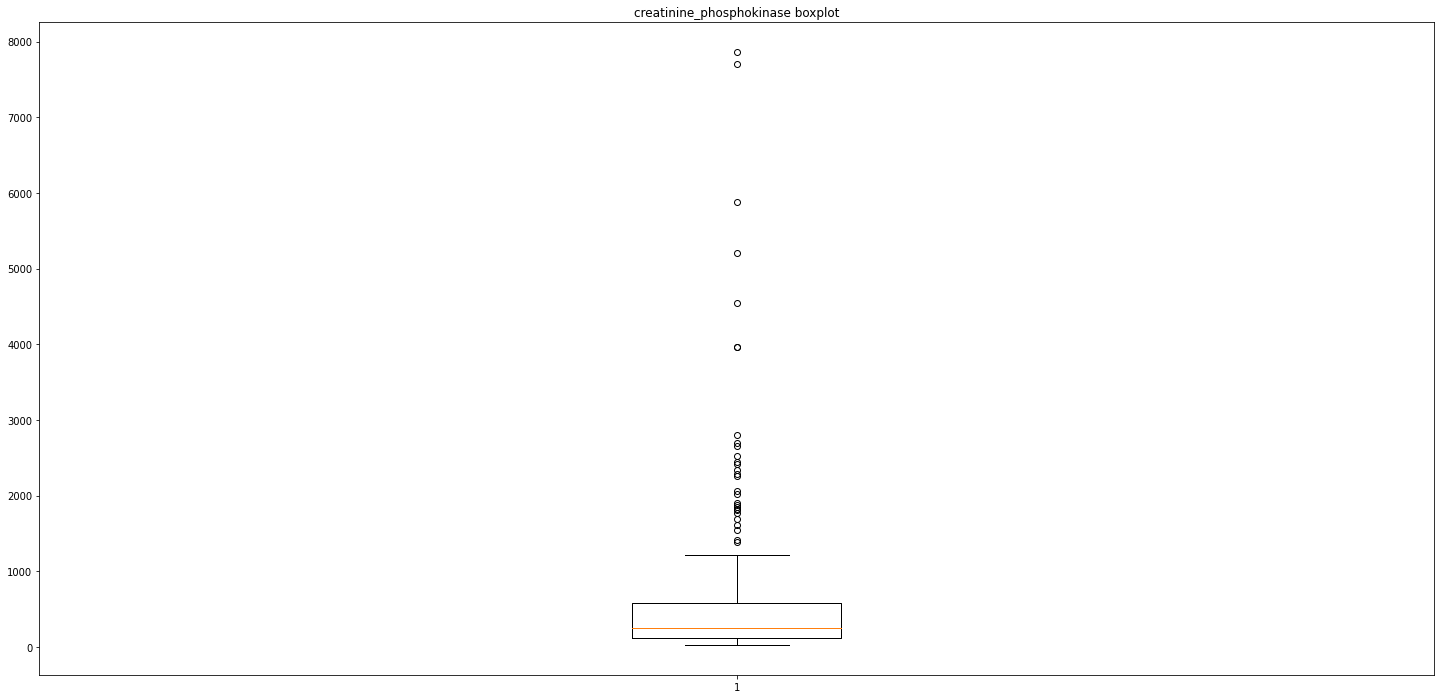

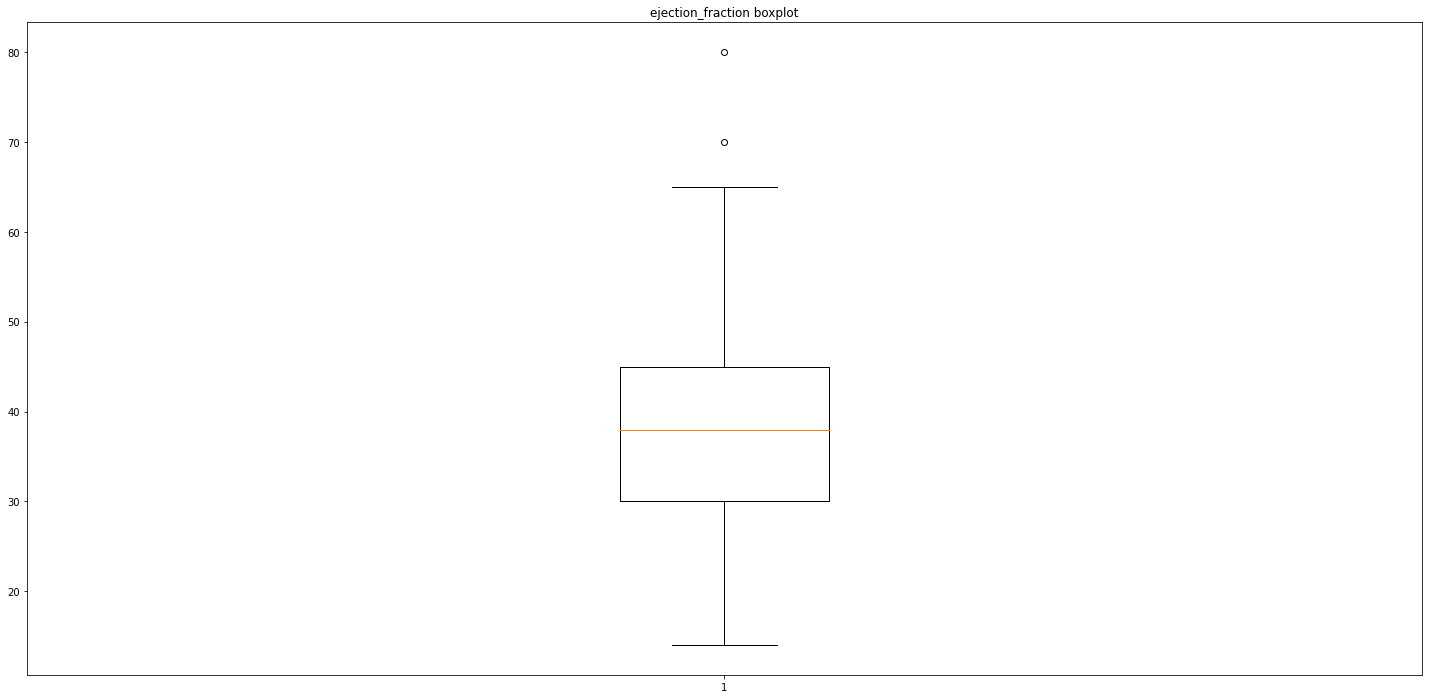

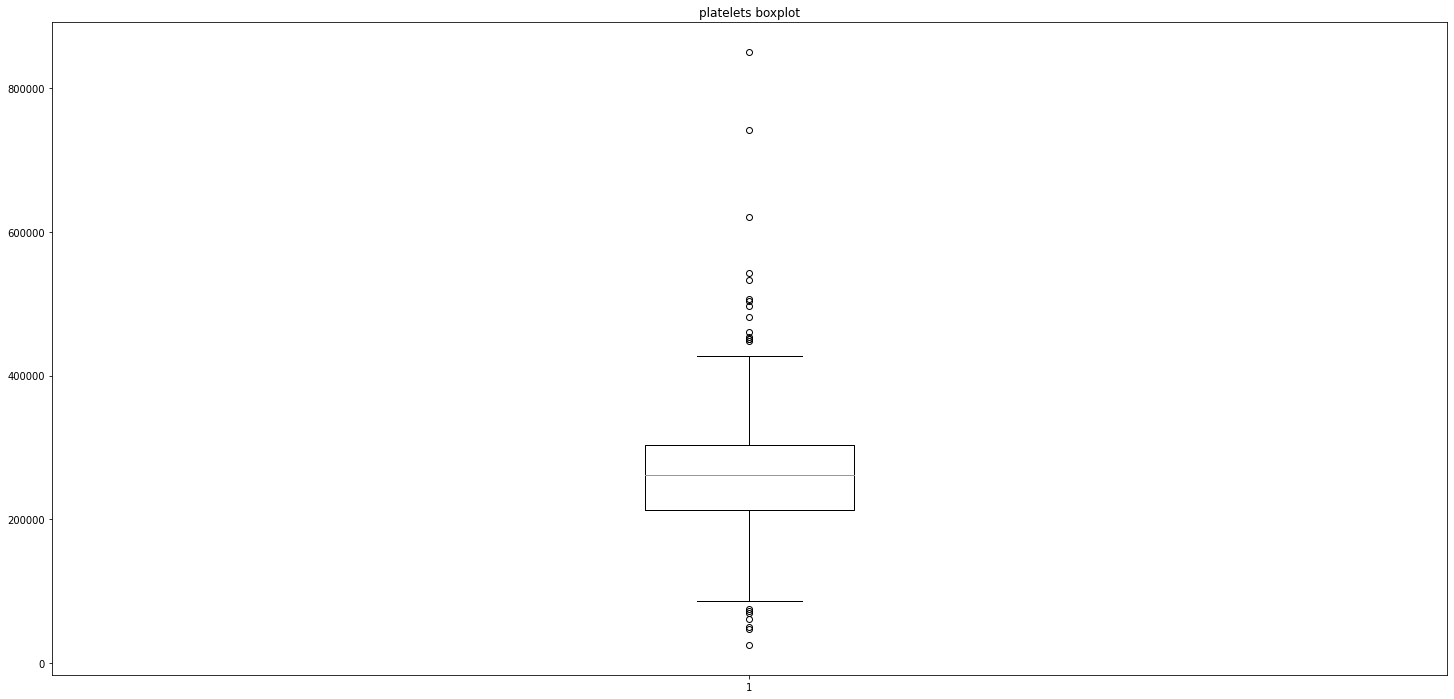

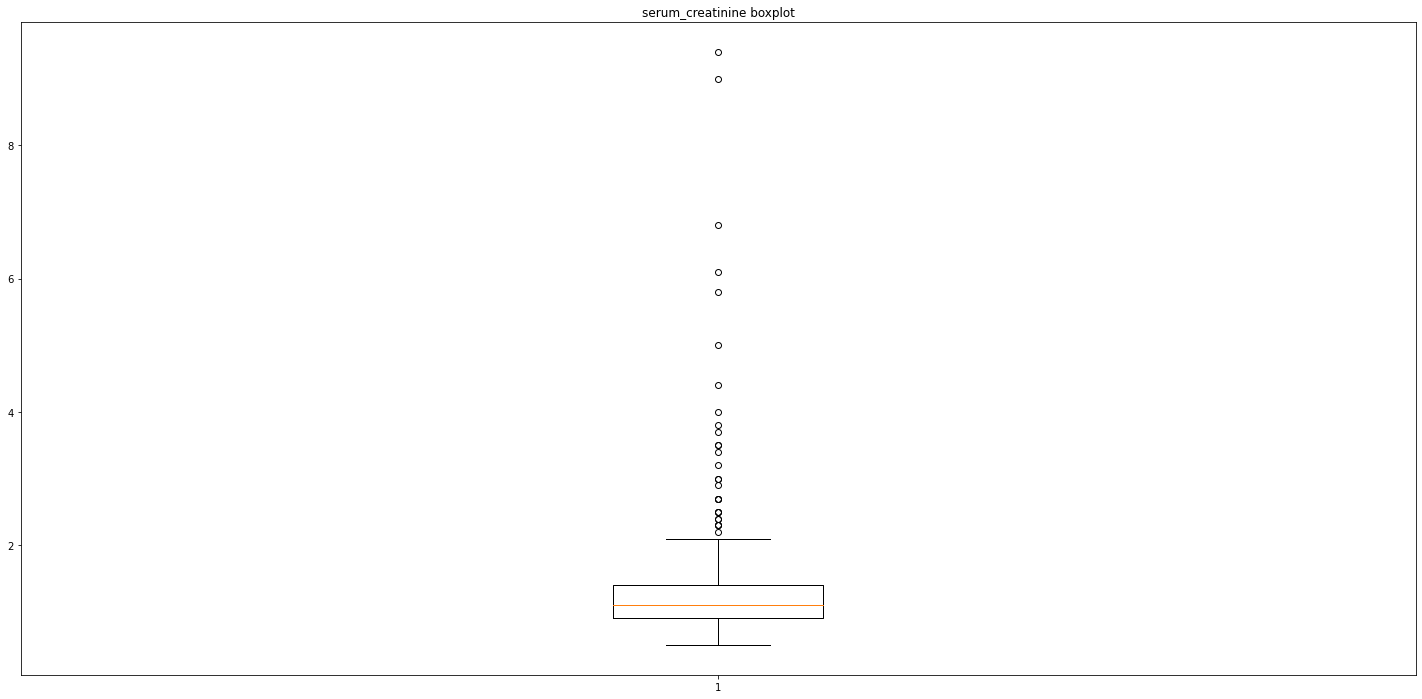

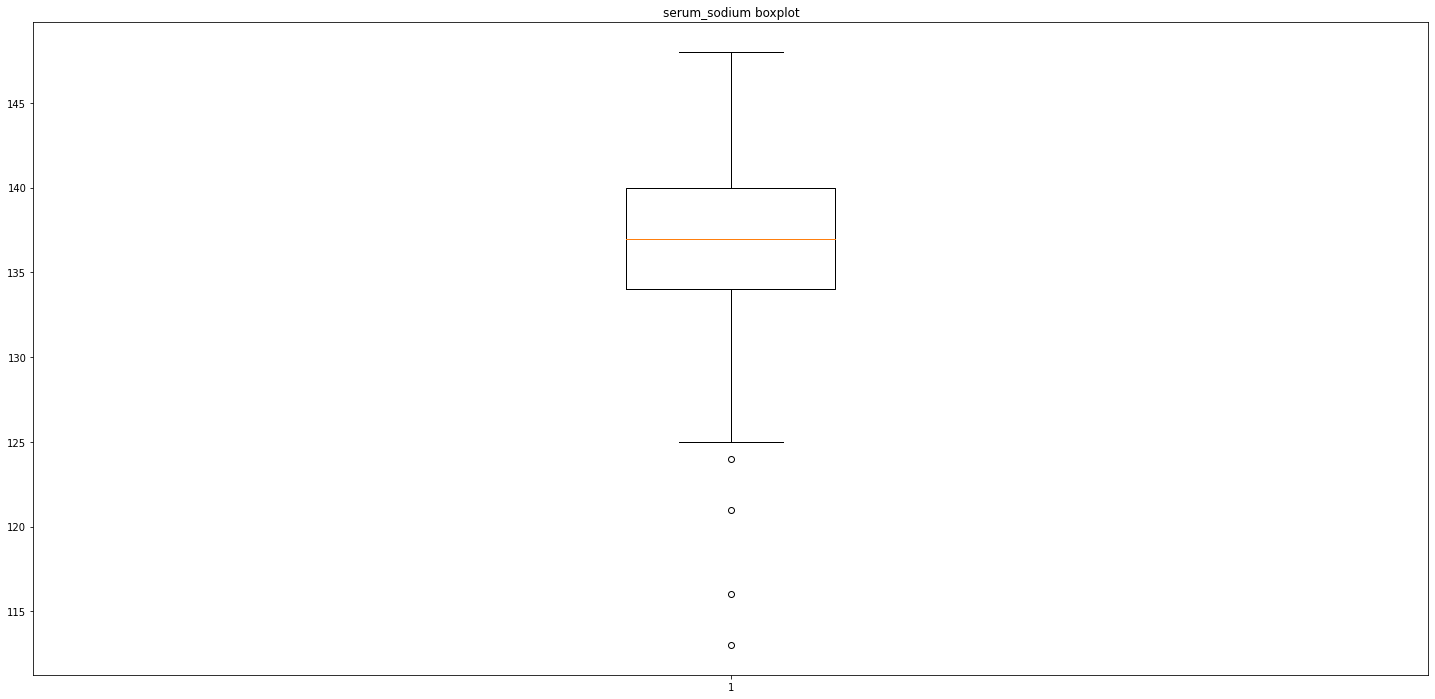

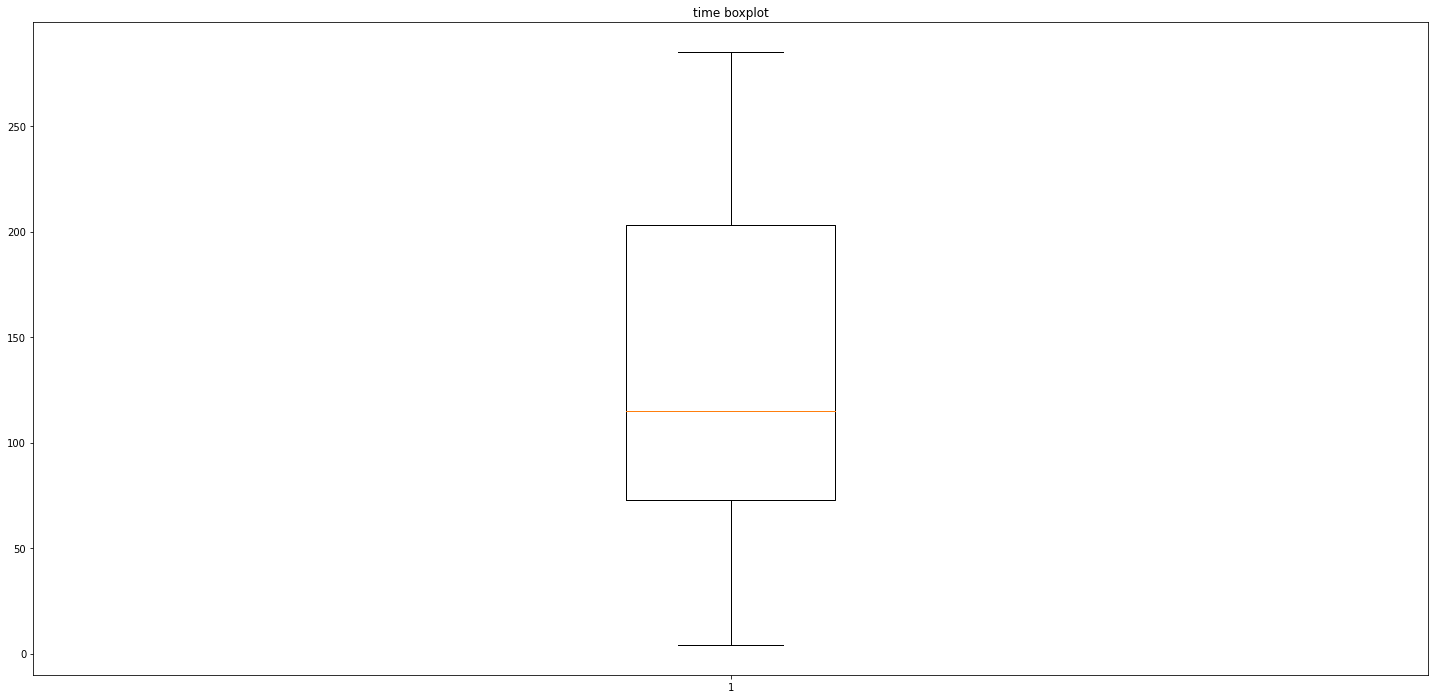

In [15]:
# examining the outliers in the attrebutes 

#report data frame
Outliers_report = pd.DataFrame(columns = ["Q1","Q3","IQR","Lower_bound","Upper_bound","Outliers"], index = numerical_values)
attrebute_outliers =list()
for column in numerical_values :
    report_list = list()
    #plotting the box plot.
    plt.figure(figsize=(25,12),)
    plt.boxplot(Datav1[column])
    plt.title( '%s boxplot' % column)
    plt.show()
    
    # Claculating the IQR
    Q1 = Datav1[column].quantile(0.25)
    Q3 = Datav1[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_bound  = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR
    
    min_value = min(Datav1[column])
    Max_value = max(Datav1[column])

    #Specifying if the column contains outliers or not by comparing the min and the max values with the bounds.
    cond = True
    if Upper_bound < Max_value or Lower_bound > min_value :
        cond = True
        attrebute_outliers.append(column)
    else :
        cond = False
    report_list.extend([Q1,Q3,IQR,Lower_bound,Upper_bound,cond])
    Outliers_report.loc[column]= report_list
    


In [16]:
Outliers_report

,Q1,Q3,IQR,Lower_bound,Upper_bound,Outliers
age,51.0,70.0,19.0,22.5,98.5,False
creatinine_phosphokinase,116.5,582.0,465.5,-581.75,1280.25,True
ejection_fraction,30.0,45.0,15.0,7.5,67.5,True
platelets,212500.0,303500.0,91000.0,76000.0,440000.0,True
serum_creatinine,0.9,1.4,0.5,0.15,2.15,True
serum_sodium,134.0,140.0,6.0,125.0,149.0,True
time,73.0,203.0,130.0,-122.0,398.0,False


Now That we have successfuly determined the upper and the lower bounds for the values and the outlers , which helped us indicating the columns containg the outliers, it is time to extract these outliers

In [17]:
#detecting the outliers in each attrebute
Outliers_index_dict = dict()
for column in attrebute_outliers : 
    Lower_bound = Outliers_report.loc[column,"Lower_bound"]
    Upper_bound = Outliers_report.loc[column,"Upper_bound"]
    Lower_bound_Outliers = np.where(Datav1[column]< Lower_bound)[0].tolist()
    Upper_bound_Outliers = np.where(Datav1[column] > Upper_bound)[0].tolist()
    print ("%s"% column, " outliers : ")
    print(Lower_bound_Outliers,Upper_bound_Outliers)
    print("\n")
    Outliers = list()
    Outliers.extend(Lower_bound_Outliers)
    Outliers.extend(Upper_bound_Outliers)
    Outliers_index_dict[column] = Outliers

creatinine_phosphokinase  outliers : 
[] [1, 38, 46, 52, 60, 72, 103, 107, 130, 134, 139, 147, 149, 153, 163, 164, 171, 176, 187, 200, 208, 227, 246, 250, 280, 283, 295, 296, 297]


ejection_fraction  outliers : 
[] [64, 217]


platelets  outliers : 
[15, 163, 167, 200, 230, 277, 281] [7, 47, 55, 69, 105, 109, 117, 162, 212, 224, 240, 279, 287, 296]


serum_creatinine  outliers : 
[] [4, 9, 10, 28, 31, 35, 38, 39, 48, 52, 54, 56, 61, 65, 82, 104, 117, 124, 129, 131, 150, 167, 183, 203, 217, 228, 247, 281, 282]


serum_sodium  outliers : 
[4, 19, 126, 199] []




# 1.5 Data distribution analysis

<Figure size 432x288 with 0 Axes>

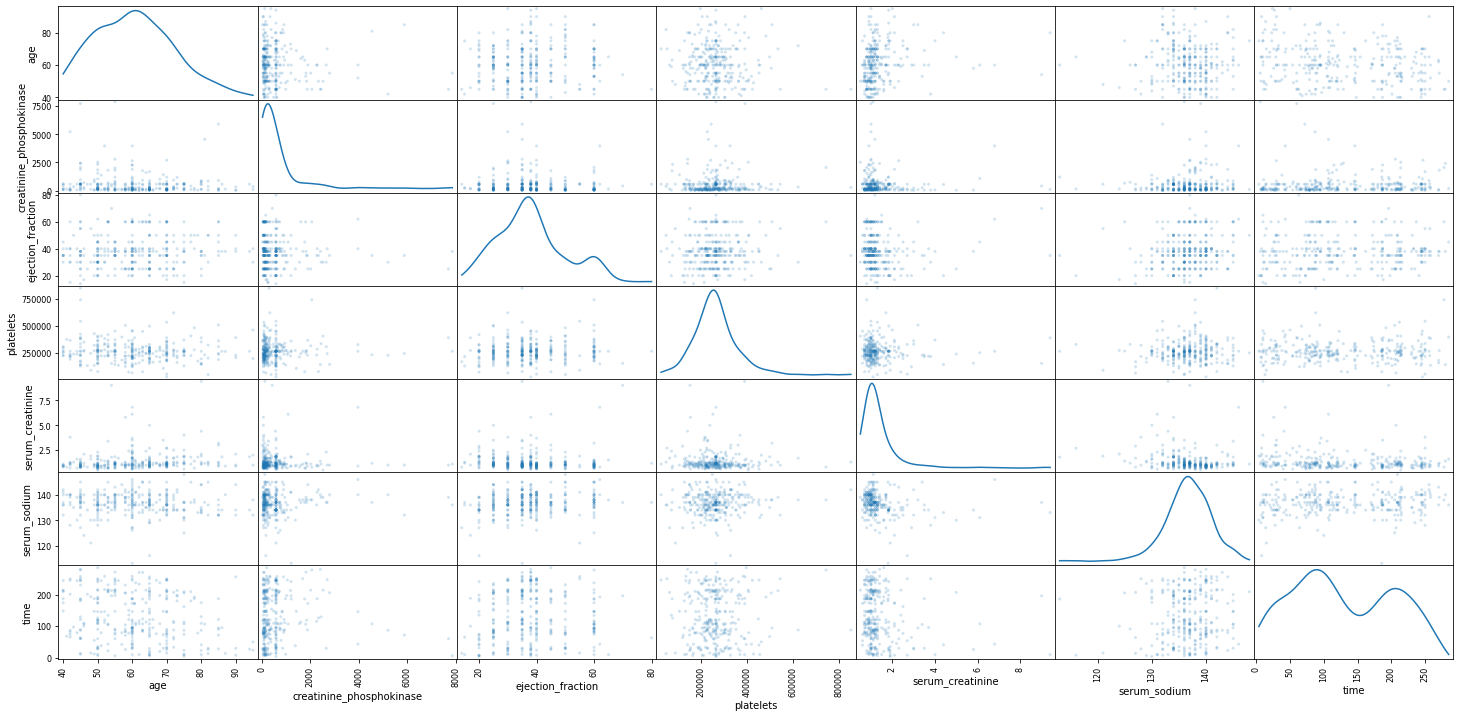

In [18]:
plt.figure()
dist = pd.plotting.scatter_matrix(Datav1[numerical_values],alpha=0.2, figsize=(25,12), diagonal="kde",grid=True)
plt.show()

# 1.5 Correlation Analysis

Correlation is vital for our analysis and modeling as it is essential for locating the important variables that other variables depends on, by measuring the strength of association between two variables and the direction of the relationship, on the scale from -1 to +1.

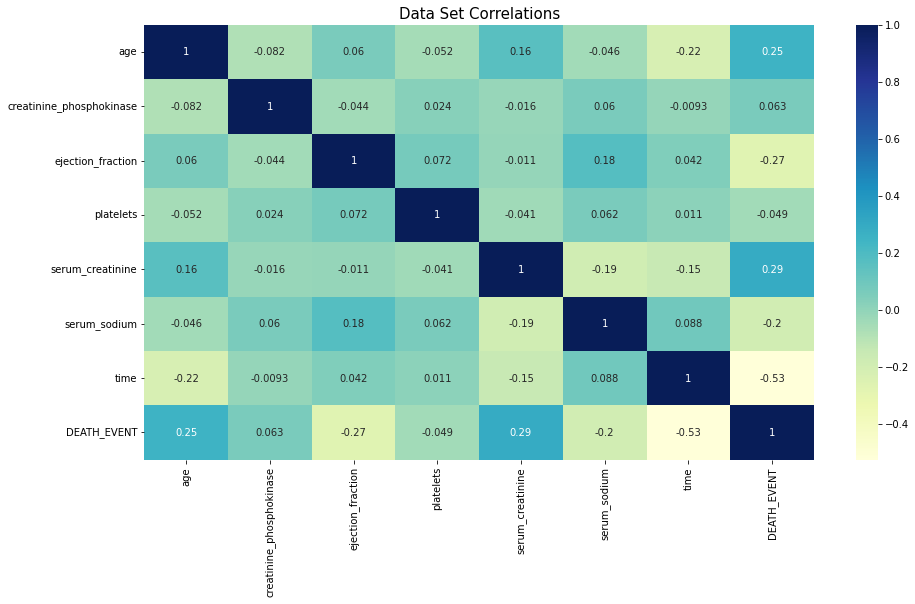

In [19]:
plt.figure(figsize=(15,8),)
corr_plot = sns.heatmap(Datav1.corr(), cmap="YlGnBu", annot=True)
plt.title('Data Set Correlations', size=15)
plt.show()

all_corr = Datav1[numerical_values].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
all_corr[all_corr['Feature 1'] == 'age']
df_cor=all_corr
df_cor.drop(df_cor.iloc[1::2].index, inplace=True)
df_cor_end = df_cor.drop(df_cor[df_cor['Correlation Coefficient'] == 1.0].index)


In [20]:
df_cor_end

,Feature 1,Feature 2,Correlation Coefficient
8,age,time,0.224068
10,serum_creatinine,serum_sodium,0.189095
12,serum_sodium,ejection_fraction,0.175902
14,serum_creatinine,age,0.159187
16,serum_creatinine,time,0.149315
18,serum_sodium,time,0.087640
20,creatinine_phosphokinase,age,0.081584
22,platelets,ejection_fraction,0.072177
24,platelets,serum_sodium,0.062125
26,age,ejection_fraction,0.060098


As indicated the relationships between all the attributes are so weak, which is a great indicator of the independence of the attributes

# 2. Data analysis

In this phase we intent to figure out the relationship between the inputs and the output, the analysis will be executed on 3 phases :
1. Numerical attributes to the output analysis
2. Categorical attributes to the output analysis
3. multible attributes to the output analysis

# 2.1 Numerical attributes to the output analysis

The main objective of this analysis is to detect the areas using them we can make decisions regarding the output

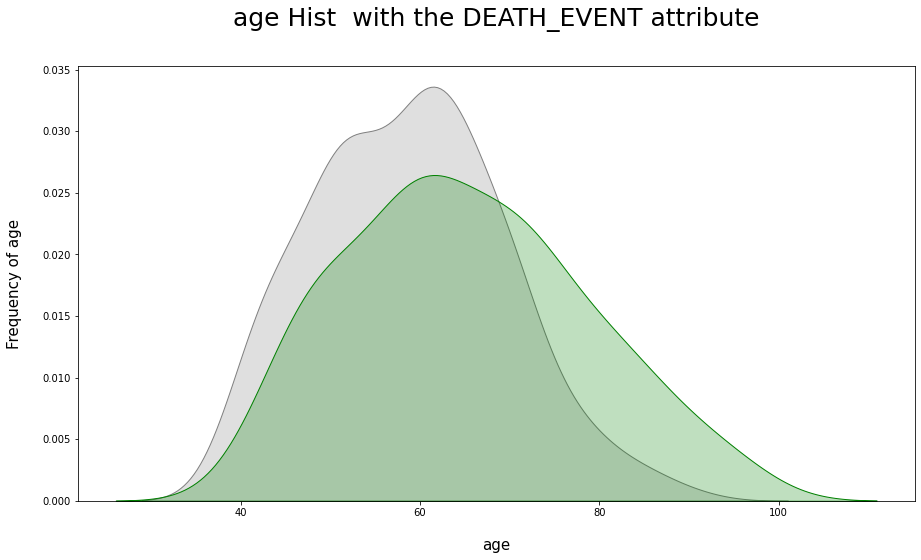

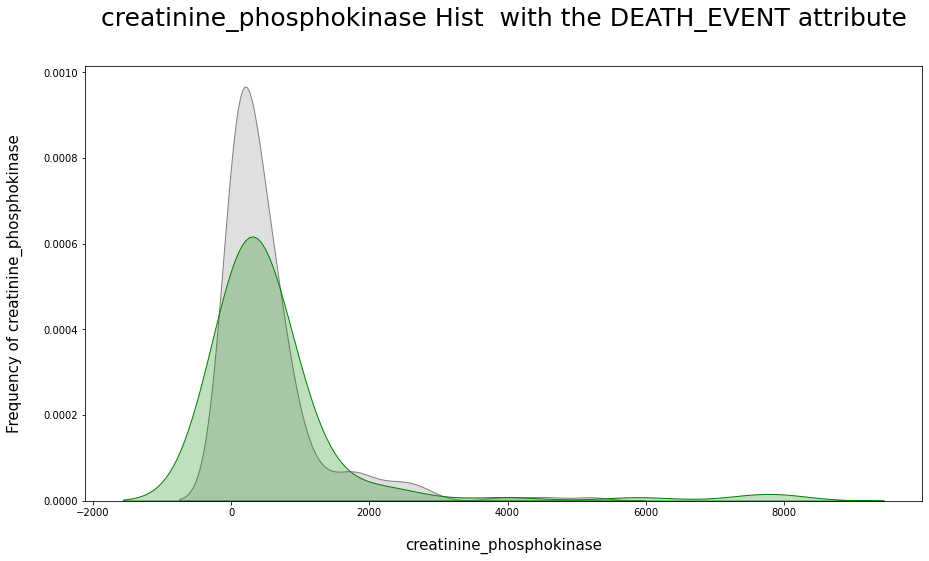

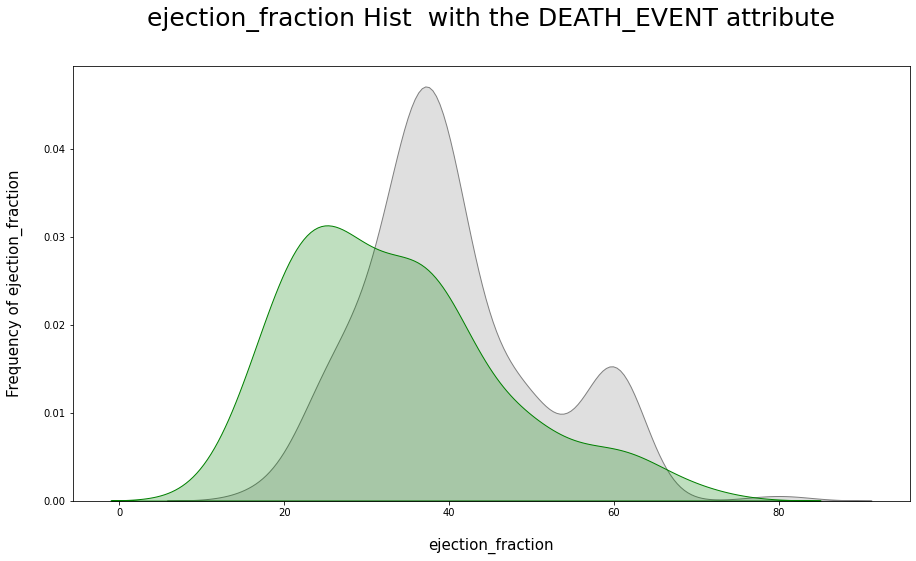

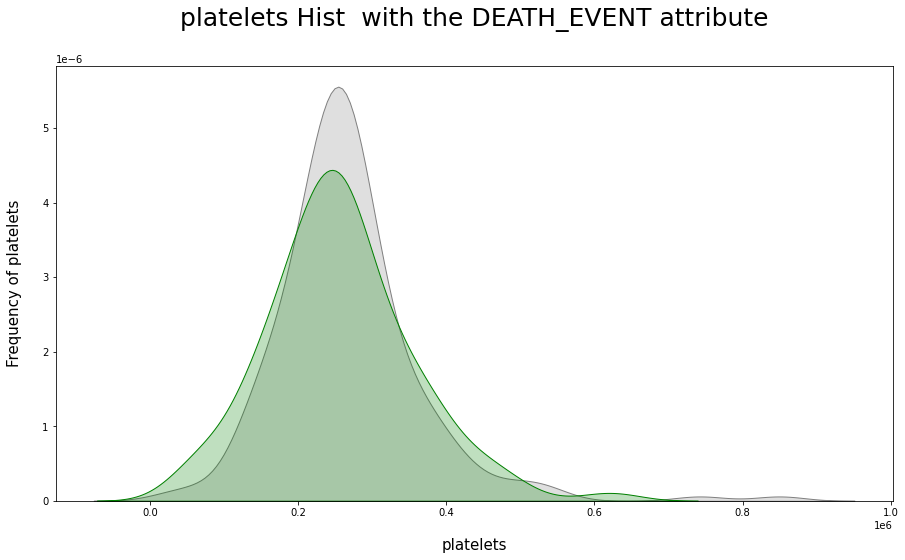

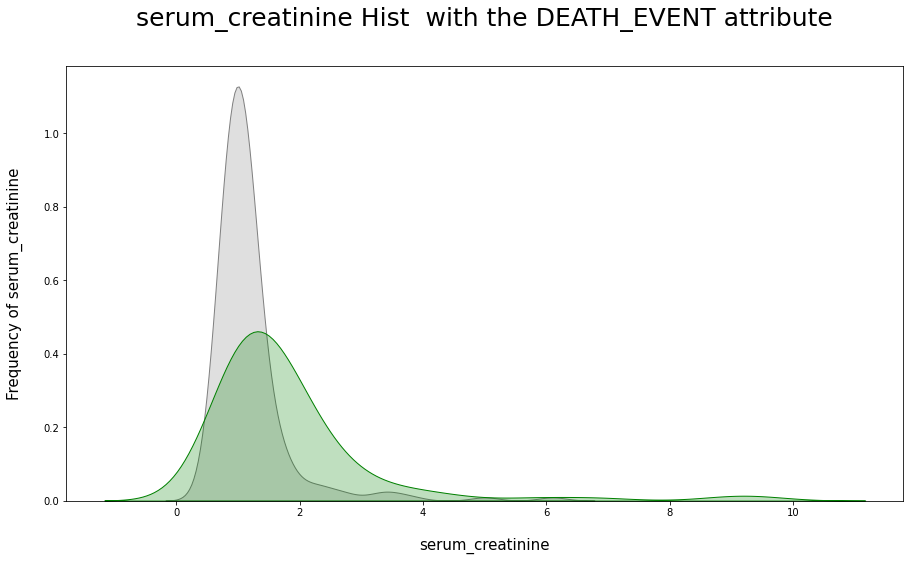

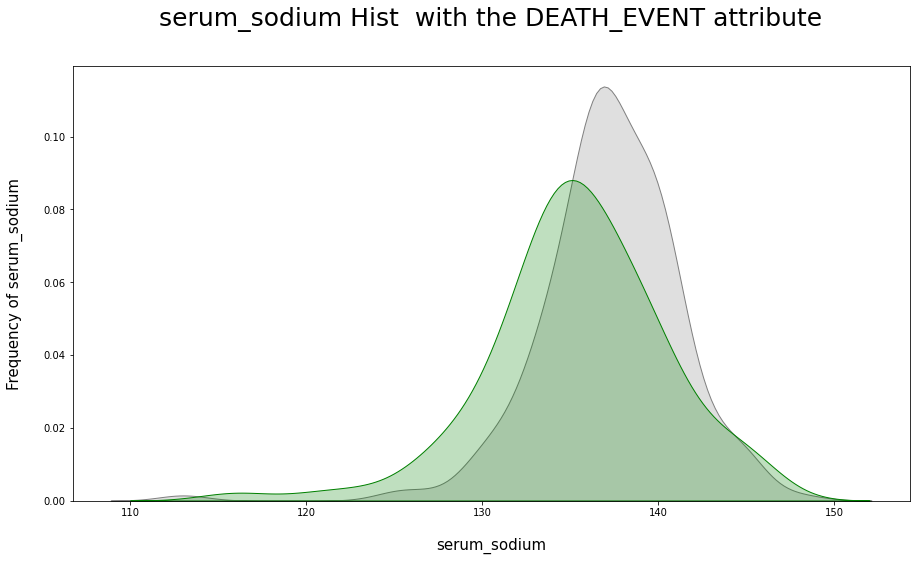

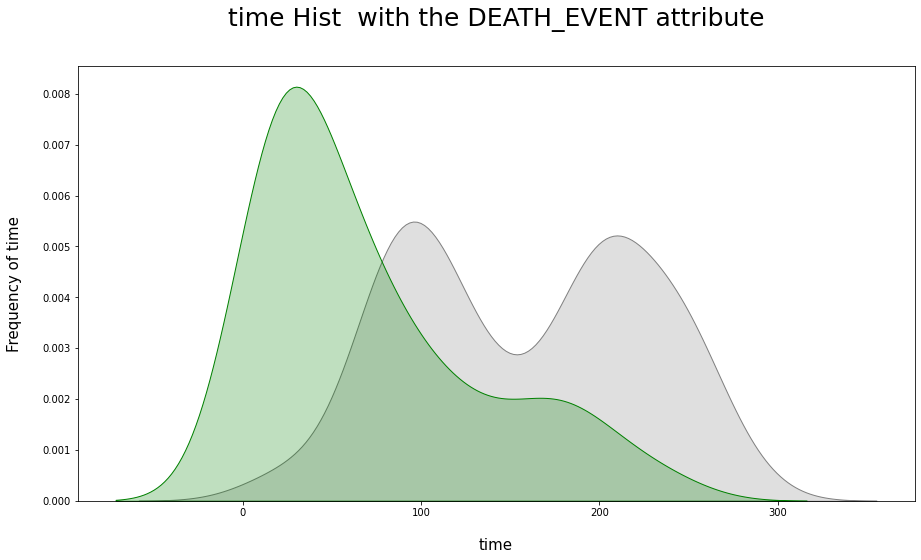

In [21]:
Decision_Area_df = pd.DataFrame(columns = ["Above","out_above","below","Out_below"],index =numerical_values )


for attribute in numerical_values :
    # Kernel Density Plot
    fig = plt.figure(figsize=(15,8),)
    ax=sns.kdeplot(Datav1.loc[(Datav1['DEATH_EVENT'] == 0),attribute] , color='gray',shade=True,label='Death')
    ax=sns.kdeplot(Datav1.loc[(Datav1['DEATH_EVENT'] == 1),attribute] , color='g',shade=True, label='Alive')
    plt.title('%s Hist  with the DEATH_EVENT attribute' %attribute, fontsize = 25, pad = 40)
    plt.ylabel("Frequency of %s"%attribute, fontsize = 15, labelpad = 20)
    plt.xlabel(attribute, fontsize = 15, labelpad = 20);
    plt.show()
    
    
    Death = Datav1[Datav1["DEATH_EVENT"] == 1]
    live = Datav1[Datav1["DEATH_EVENT"] == 0]
    Death_Max = max(Death[attribute])
    Death_low = min(Death[attribute])
    live_Max = max(live[attribute])
    live_low = min(live[attribute])
    
    
    
    D_area_df_row = list()
    if Death_Max > live_Max : 
        D_area_df_row.append(live_Max)
        D_area_df_row.append("Death event")
    elif Death_Max < live_Max : 
        D_area_df_row.append(Death_Max)
        D_area_df_row.append("Life event")
    if Death_low < live_low : 
        D_area_df_row.append(live_low)
        D_area_df_row.append("Death event")
    elif Death_low > live_low : 
        D_area_df_row.append(Death_low)
        D_area_df_row.append("Life event")
    Decision_Area_df.loc[attribute] = D_area_df_row

In [22]:
Decision_Area_df

,Above,out_above,below,Out_below
age,90.0,Death event,42.0,Life event
creatinine_phosphokinase,5209,Death event,30,Death event
ejection_fraction,70,Life event,17,Death event
platelets,621000.0,Life event,47000.0,Life event
serum_creatinine,6.1,Death event,0.6,Life event
serum_sodium,146,Life event,116,Life event
time,241,Life event,12,Death event


The output table above shows clearly where the simple decision areas are, for example for the age feature, if the age is higher the 90 then the chances of having heart attack is great, yet if the age is lower than 42 then the chances of not having heart attack is great, and so on ...

# 2.2 Categorical attributes to the output analysis

In [23]:
cat_cols = Cat_columns
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)


def cat_graph(data_,attr,out):
    sns.catplot(x=attr, hue=out, kind="count",palette="crest", edgecolor=".6",data= data_)
    plt.title( 'DEATH_EVENT occurrence in %s  attribute' %attr)
    plt.show()
    
    return Datav1[[out,attr]].groupby([attr,out], as_index=False).size().sort_values(by=attr, ascending=False)

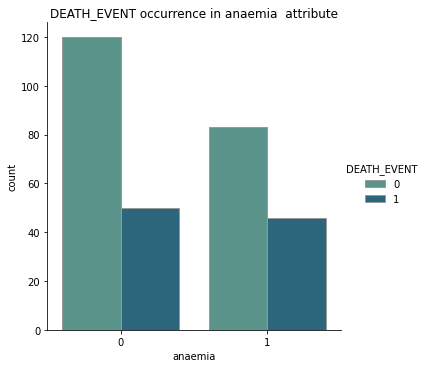

  anaemia  DEATH_EVENT  size
2       1            0    83
3       1            1    46
0       0            0   120
1       0            1    50 



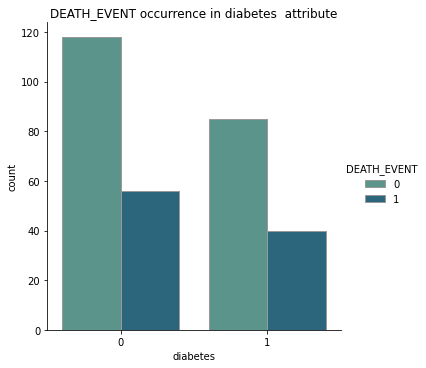

  diabetes  DEATH_EVENT  size
2        1            0    85
3        1            1    40
0        0            0   118
1        0            1    56 



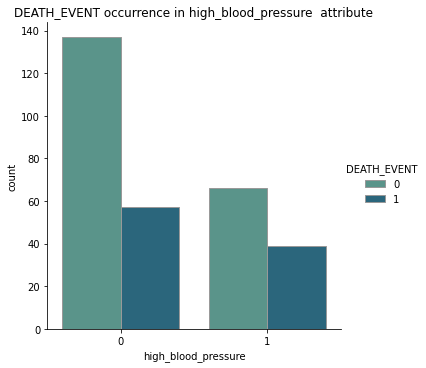

  high_blood_pressure  DEATH_EVENT  size
2                   1            0    66
3                   1            1    39
0                   0            0   137
1                   0            1    57 



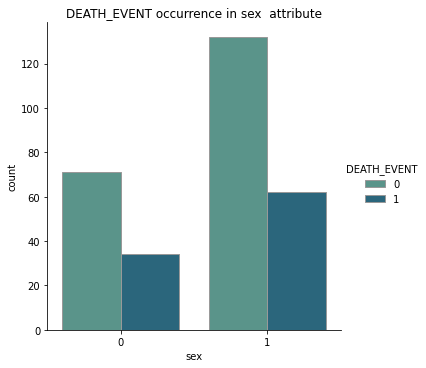

  sex  DEATH_EVENT  size
2   1            0   132
3   1            1    62
0   0            0    71
1   0            1    34 



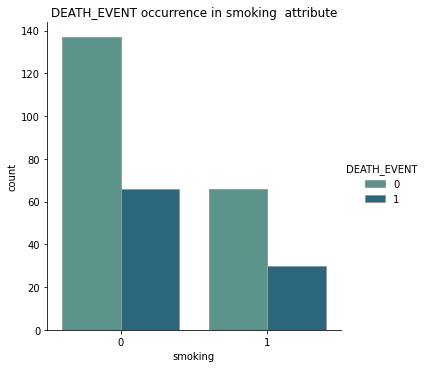

  smoking  DEATH_EVENT  size
2       1            0    66
3       1            1    30
0       0            0   137
1       0            1    66 



In [24]:
for attr in Cat_columns :
    print(cat_graph(Datav1,attr,"DEATH_EVENT"),'\n')

# The output : 

* **The Smoking impact** is the smokers have 31% chance to have a heart attack, yet the non smokers have cahnce of 32.5% of having a heart attack.

* **The gender Impact :** The females have the percentage of 31.9% of having heart attack while men have the chance of 32.38% of having it.

* **Having high blood preasure** has a significant impact on the chances of having heart attack as : the high preasure people have 37.14% chance of having heart attack while the people with normal blood preasure have the chance of 29.38% chance.

* **Having diabetes** gives the one the chance of 32% of having heart attack, while not having a diabetes gives the chance of 32.14% of having the heart attack.

* **Having Anaemia** has a great impact on having heart attack, as the person with Anaemia has the chance of 35.66% of having heart attack, copared to the chance of  29.41% if the person doesn't have Anaemia

# 2.3 Multible attributes to the output analysis

In [25]:
def facetgrapher(data,col,row,attr,bins,method):
    g = sns.FacetGrid(data,size=5, col=col, row=row, margin_titles=True, hue = "DEATH_EVENT",
                  palette="crest")
    g = g.map(sns.histplot, attr, edgecolor = 'white',bins=bins);
    g.fig.suptitle('Death Event by the gender and %a attributes' %attr, size = 25)
    plt.subplots_adjust(top=0.90)
    plt.show()
    return data[[attr,row,col]].groupby([attr,row,col], as_index=False).agg(method).sort_values(by=row, ascending=False)


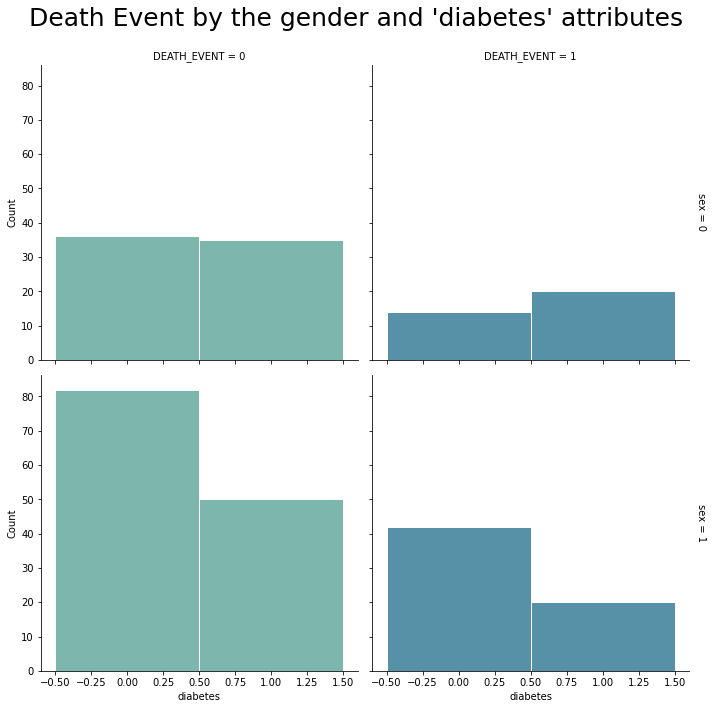

,diabetes,sex,DEATH_EVENT,size
2,0,1,0,82
3,0,1,1,42
6,1,1,0,50
7,1,1,1,20
0,0,0,0,36
1,0,0,1,14
4,1,0,0,35
5,1,0,1,20


In [26]:
facetgrapher(Datav1,"DEATH_EVENT","sex","diabetes",5,"size")

**Output:**
* If the person is a male and has diabetes	, his chance of having heart attack is %33.87 
* If the person is a male and doesn't have diabetes	, his chance of having heart attack is %28.57 
* If the person is a female and has diabetes	, his chance of having heart attack is 36.36%
* If the person is a female and doesn't have diabetes	, his chance of having heart attack is 28%

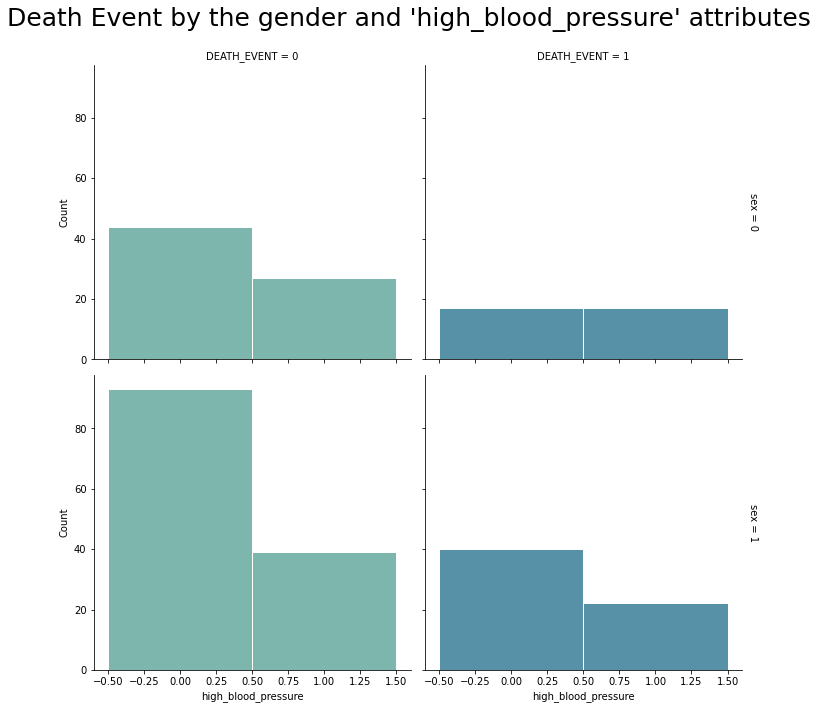

,high_blood_pressure,sex,DEATH_EVENT,size
2,0,1,0,93
3,0,1,1,40
6,1,1,0,39
7,1,1,1,22
0,0,0,0,44
1,0,0,1,17
4,1,0,0,27
5,1,0,1,17


In [27]:
facetgrapher(Datav1,"DEATH_EVENT","sex","high_blood_pressure",5,"size")

**Output:**
* If the person is a male and has high blood pressure	, his chance of having heart attack is %36 
* If the person is a male and doesn't have high blood pressure	, his chance of having heart attack is %30
* If the person is a female and has high blood pressure	, his chance of having heart attack is 27%
* If the person is a female and doesn't have high blood pressure	, his chance of having heart attack is 3.57%

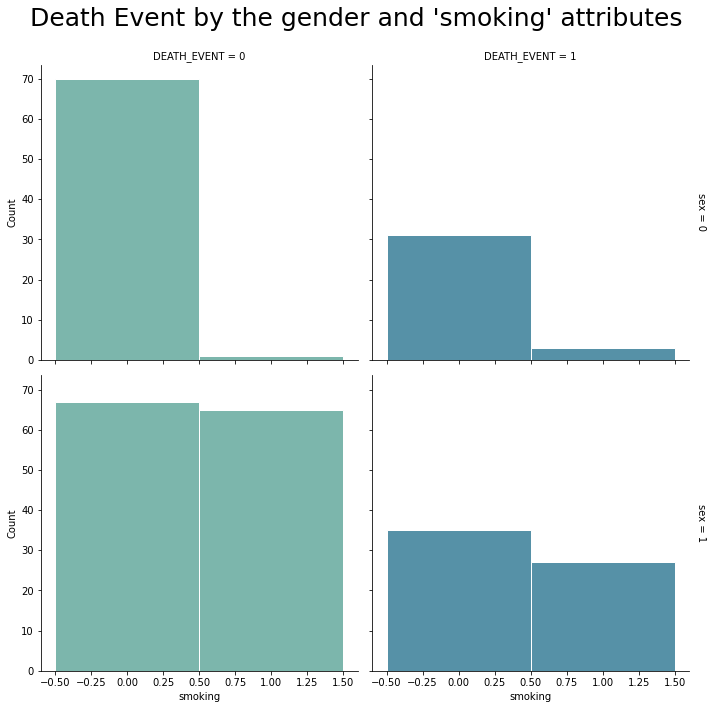

,smoking,sex,DEATH_EVENT,size
2,0,1,0,67
3,0,1,1,35
6,1,1,0,65
7,1,1,1,27
0,0,0,0,70
1,0,0,1,31
4,1,0,0,1
5,1,0,1,3


In [28]:
facetgrapher(Datav1,"DEATH_EVENT","sex","smoking",5,"size")

**Output:**
* If the person is a male and smoke	, his chance of having heart attack is %34.31 
* If the person is a male and doesn't smoke	, his chance of having heart attack is %29.34
* If the person is a female and smoke	, his chance of having heart attack is 75%
* If the person is a female and doesn't smoke	, his chance of having heart attack is 30.69%

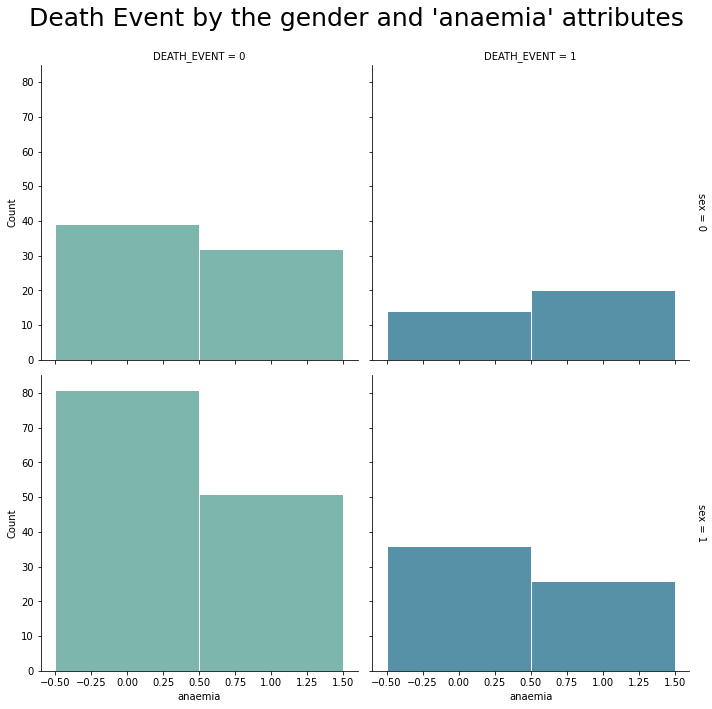

,anaemia,sex,DEATH_EVENT,size
2,0,1,0,81
3,0,1,1,36
6,1,1,0,51
7,1,1,1,26
0,0,0,0,39
1,0,0,1,14
4,1,0,0,32
5,1,0,1,20


In [29]:
facetgrapher(Datav1,"DEATH_EVENT","sex","anaemia",5,"size")

**Output:**
* If the person is a male and has anaemia 	, his chance of having heart attack is %30.76
* If the person is a male and doesn't have anaemia	, his chance of having heart attack is %33.76
* If the person is a female and has anaemia	, his chance of having heart attack is 38.46%
* If the person is a female and doesn't have anaemia	, his chance of having heart attack is 26.41%

# 2.4 cutting the continues attributes into bins

The main objective of this analysis is to examin which numerical features could be converted into categorical, 

1. Helps us to better understand the relationship between the numerical attributes and the output.
2. we may use the categorical version of the column instead of the numerical version if it enhances the machine learning  moedel preformance.

In [30]:
Datav2 = Datav1.copy()

In [31]:
def bin_cutter ( Data, column,out):

    Data[column] = pd.qcut(Data[column], 10)
    fig, axs = plt.subplots(figsize=(22, 9))
    sns.countplot(x=column, hue=out, data=Data,palette = "crest")
    plt.xlabel(column, size=15, labelpad=20)
    plt.ylabel('Count', size=15, labelpad=20)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=15)
    plt.legend(['Alive', 'Dead'], loc='upper right', prop={'size': 15})
    plt.title('Count of DEATH_EVENTS in {} Feature'.format(column), size=15, y=1.05)
    plt.show()
    return Data[[column, out]].groupby([column], as_index=False).mean().sort_values(by=column, ascending=True)
     

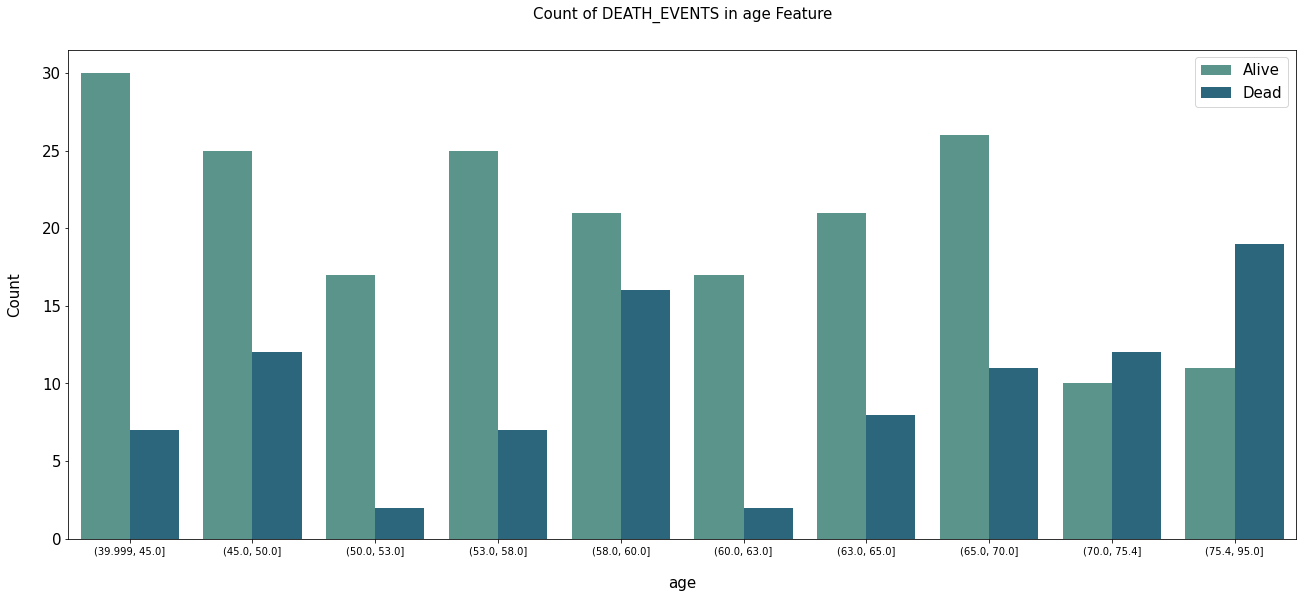

,age,DEATH_EVENT
0,"(39.999, 45.0]",0.189189
1,"(45.0, 50.0]",0.324324
2,"(50.0, 53.0]",0.105263
3,"(53.0, 58.0]",0.218750
4,"(58.0, 60.0]",0.432432
5,"(60.0, 63.0]",0.105263
6,"(63.0, 65.0]",0.275862
7,"(65.0, 70.0]",0.297297
8,"(70.0, 75.4]",0.545455
9,"(75.4, 95.0]",0.633333


In [32]:
bin_cutter(Datav2,"age","DEATH_EVENT")

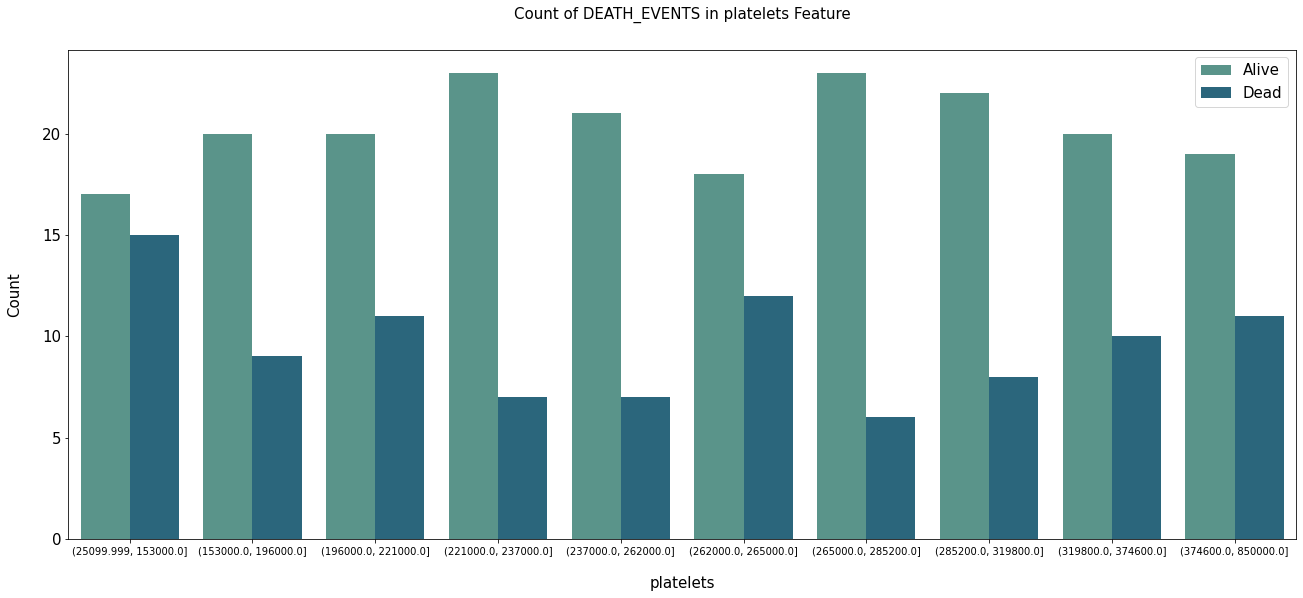

,platelets,DEATH_EVENT
0,"(25099.999, 153000.0]",0.468750
1,"(153000.0, 196000.0]",0.310345
2,"(196000.0, 221000.0]",0.354839
3,"(221000.0, 237000.0]",0.233333
4,"(237000.0, 262000.0]",0.250000
5,"(262000.0, 265000.0]",0.400000
6,"(265000.0, 285200.0]",0.206897
7,"(285200.0, 319800.0]",0.266667
8,"(319800.0, 374600.0]",0.333333
9,"(374600.0, 850000.0]",0.366667


In [33]:
bin_cutter(Datav2,"platelets","DEATH_EVENT")

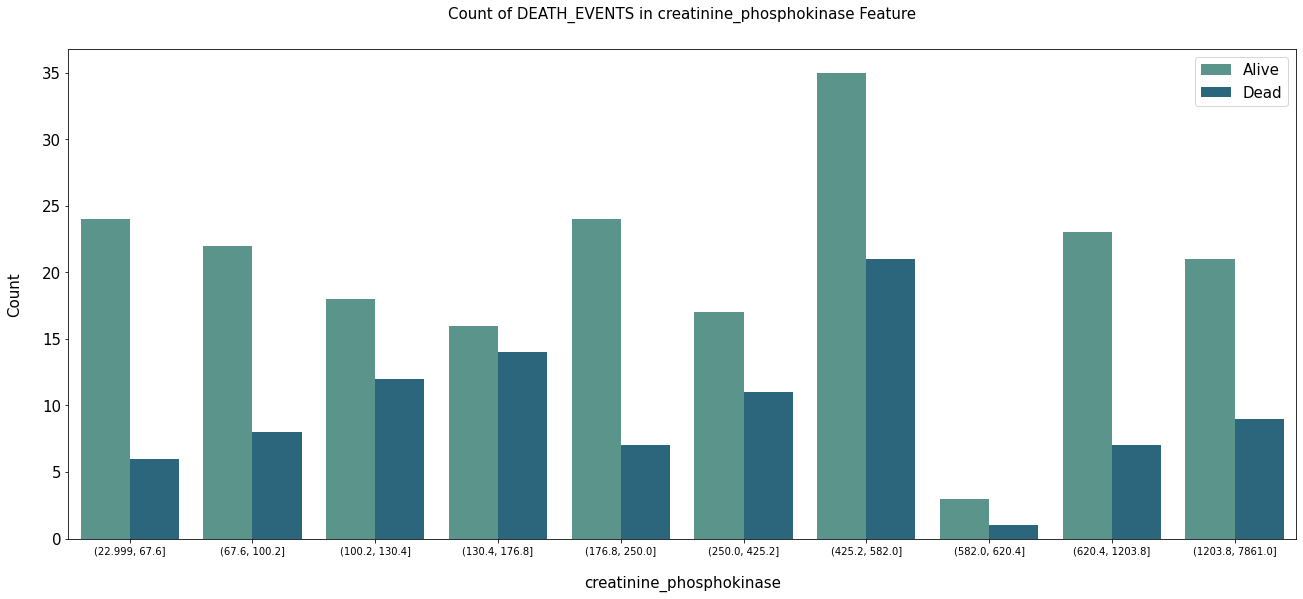

,creatinine_phosphokinase,DEATH_EVENT
0,"(22.999, 67.6]",0.200000
1,"(67.6, 100.2]",0.266667
2,"(100.2, 130.4]",0.400000
3,"(130.4, 176.8]",0.466667
4,"(176.8, 250.0]",0.225806
5,"(250.0, 425.2]",0.392857
6,"(425.2, 582.0]",0.375000
7,"(582.0, 620.4]",0.250000
8,"(620.4, 1203.8]",0.233333
9,"(1203.8, 7861.0]",0.300000


In [34]:
bin_cutter(Datav2,"creatinine_phosphokinase","DEATH_EVENT")

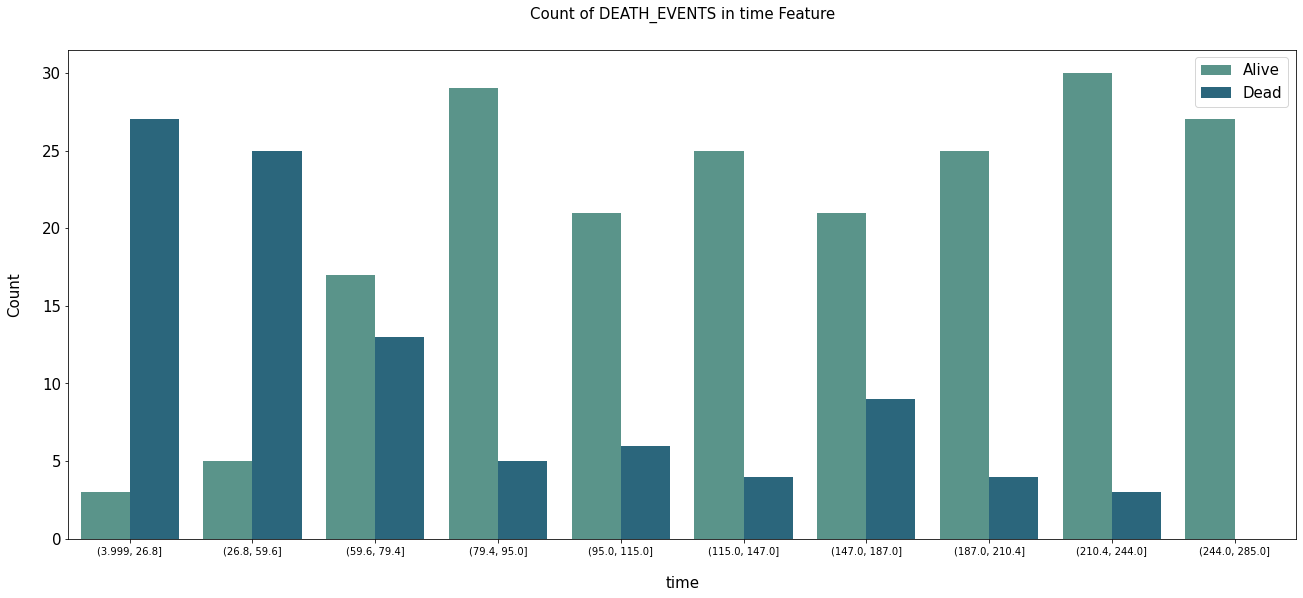

,time,DEATH_EVENT
0,"(3.999, 26.8]",0.900000
1,"(26.8, 59.6]",0.833333
2,"(59.6, 79.4]",0.433333
3,"(79.4, 95.0]",0.147059
4,"(95.0, 115.0]",0.222222
5,"(115.0, 147.0]",0.137931
6,"(147.0, 187.0]",0.300000
7,"(187.0, 210.4]",0.137931
8,"(210.4, 244.0]",0.090909
9,"(244.0, 285.0]",0.000000


In [35]:
bin_cutter(Datav2,"time","DEATH_EVENT")

# 3. Data Cleaning and preparation

**Notes :** 


* There is no missing values to deal with
* The categorical attributes need to be converted into dummeis 
* The outliers need to be further investigated to decide the appropriate actions to be taken.
* The numerical attributes need to be scaled.
* The input attributes need to be seperated from the output.
* The data must be splitted into trining and testing set

# 3.1 Categorical data to dummy variables

Converting the categorical variables into dummy variables means each attribute will have a value of either 0 or 1, representing the presence or absence of that attribute.

We are not going to convert the categorical variables into dummy variables in this project as all the categorical variables we are dealing with consists of just count of 2 unique values

# 3.2 Outliers treatment

Previously we have detected some outliers within some of the numerical values, yet further investigation needs to be applied to better understand the nature of these outliers, and to be able to specify the right course of action to handle them.

In [36]:
Outliers_report

,Q1,Q3,IQR,Lower_bound,Upper_bound,Outliers
age,51.0,70.0,19.0,22.5,98.5,False
creatinine_phosphokinase,116.5,582.0,465.5,-581.75,1280.25,True
ejection_fraction,30.0,45.0,15.0,7.5,67.5,True
platelets,212500.0,303500.0,91000.0,76000.0,440000.0,True
serum_creatinine,0.9,1.4,0.5,0.15,2.15,True
serum_sodium,134.0,140.0,6.0,125.0,149.0,True
time,73.0,203.0,130.0,-122.0,398.0,False


In [37]:
# Outlier values Extraction
Outliers_values = dict()
for attr in Outliers_index_dict.keys():
    out_list = list()
    for ind in Outliers_index_dict[attr]:
        out_list.append(Datav1.loc[ind,attr])
    Outliers_values[attr] = out_list

In [38]:
# Outlier values comaprison with the bounds
Outliers_values_comp = dict()
for attr in Outliers_values.keys():
    Percentage_list = list()
    Upper_bound = Outliers_report.loc[attr,"Upper_bound"]
    Lower_bound = Outliers_report.loc[attr,"Lower_bound"]
    for value in Outliers_values[attr]:
        Value = value
        if Value > Upper_bound :
            Percentage_list.append(round(((Value-Upper_bound)/Upper_bound),2))
        elif Value < Lower_bound :
            Percentage_list.append(round(((Lower_bound - Value)/Lower_bound),2))
    Outliers_values_comp[attr] = Percentage_list

In [39]:
Outliers_values_comp

{'creatinine_phosphokinase': [5.14,
  1.07,
  0.08,
  2.1,
  5.02,
  3.59,
  3.07,
  0.47,
  0.41,
  2.55,
  0.21,
  0.26,
  0.77,
  0.44,
  0.82,
  0.91,
  2.1,
  0.11,
  0.48,
  0.38,
  0.78,
  1.18,
  0.58,
  0.97,
  1.11,
  0.32,
  0.42,
  0.61,
  0.88],
 'ejection_fraction': [0.19, 0.04],
 'platelets': [0.38,
  0.01,
  0.08,
  0.04,
  0.18,
  0.67,
  0.33,
  0.03,
  0.02,
  0.05,
  0.13,
  0.41,
  0.93,
  0.15,
  0.02,
  0.09,
  0.15,
  0.21,
  0.02,
  0.23,
  0.69],
 'serum_creatinine': [0.26,
  3.37,
  0.86,
  1.7,
  0.4,
  0.63,
  0.07,
  0.4,
  1.05,
  2.16,
  0.02,
  0.26,
  0.07,
  0.35,
  0.16,
  0.07,
  0.49,
  0.72,
  0.58,
  1.84,
  0.16,
  0.12,
  0.16,
  0.63,
  3.19,
  1.33,
  0.12,
  0.26,
  0.77],
 'serum_sodium': [0.07, 0.03, 0.01, 0.1]}

**Note :** Some of the detected outliers are just higher or lower than the bounds by 3% to 50% which from my prospective could be ignored, yet some of them are greater than or lower than the bounds by 100% to 600% this is un-acceptable untill the moment.

In [40]:
# Detecting the outliers with more than 50% difference than the bounds

Outliers_values_above_50_percent = dict()
Datav3 = Datav1.copy()
Out_list_drop = list()
for attr in Outliers_values_comp.keys():
    out_list = list()
    for percent,ind in zip(Outliers_values_comp[attr],Outliers_index_dict[attr]):
        if percent > .5 :
            out_list.append(ind)
            Out_list_drop.append(ind)
    Outliers_values_above_50_percent[attr] = out_list


In [41]:
#droping the above 50 outliers from the data

Datav3 = Datav3.drop(Datav3.index[Out_list_drop])

In [42]:
Datav3

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0


**Note :** I have deleted them from the new version of the data but still I have the removed observations in the old data, and their index in the Out_list_drop list, to be furthe analyzed and modeled later.

# 3.3 scaling the numerical data

As some of the features are ranging from 1 to 10 and some are ranging from 10 to 200 and some to 5000, we need to normalize the range of independent variables, as the algorithms often  calculate the distance between the data points to make better inferences out of the data.

In [43]:
# Numerical attributes normalization

scaler = StandardScaler()
standardized = scaler.fit_transform(Datav3[numerical_values])

In [44]:
scaled_num_df = pd.DataFrame(standardized,columns = scaler.feature_names_in_)

In [45]:
Datav3_temp = Datav3.drop(numerical_values,axis=1)
Datav4 = pd.concat([scaled_num_df,Datav3_temp ], axis=1, join='inner')

In [46]:
Datav4

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.176595,0.504778,-1.527003,0.035312,1.395910,-1.484979,-1.649314,0,0,1,1,0,1
2,-0.933689,-0.719841,-1.527003,-0.596490,1.395910,0.095560,-1.610152,0,0,0,1,1,1
3,0.332481,-0.592439,-1.527003,0.747526,3.056911,-4.646056,-1.597098,1,0,0,1,0,1
4,2.442766,-0.886244,0.145653,-0.665414,1.811160,-1.033397,-1.597098,1,1,0,0,0,1
5,1.176595,-0.368836,-1.945167,-1.549937,-0.057466,0.095560,-1.570990,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-0.764866,-0.514438,-0.021613,1.379328,-0.472717,0.772933,1.666426,1,1,0,1,0,1
263,0.163659,-0.740642,-0.272511,-0.952597,-0.680342,-0.130232,1.823076,1,1,0,0,0,0
264,0.079247,-0.849844,-0.021613,-1.228293,-0.265091,1.450307,1.823076,0,1,0,1,0,0
265,-0.511632,3.723630,-0.021613,0.092749,-0.057466,0.547142,1.836130,1,0,0,1,1,0


# 3.4 Data Train, Test Split

In [47]:
X = Datav4.drop("DEATH_EVENT",axis=1)
y = Datav4['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)


In [48]:
def evaluating_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    print(f'Accuracy Score: {round(accuracy_score(y_valid, pred) * 100, 3)}')
    print(f'Precision Score: {round(precision_score(y_valid,pred) * 100, 3)}')
    print(f'Recall Score: {round(recall_score(y_valid,pred) * 100, 3)}')

In [49]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

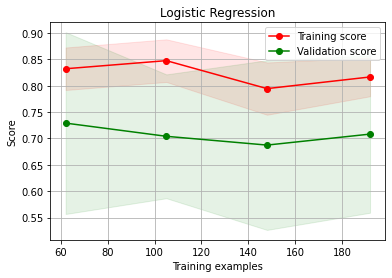

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
plot_learning_curve(logreg,"Logistic Regression",X,y)

In [51]:
evaluating_model(logreg,X_train, y_train, X_test, y_test)

Accuracy Score: 81.25
Precision Score: 69.231
Recall Score: 64.286
